### Business 
Airbnb is the online platform which connects with hosts and turists or residents.
Potential users are turists or short term residents. 
Potential hosts are people who have extra rooms or houses. 
Posts can become superhost, if they pass the certain criteria.
The room types are mainly three types: Entire house, Private room, and shared room.
In order to maximize the profits, hosts need to more focus on reviews.

### Query

* What actually residents expects and hosts consider focus on might differs.


* What attributes higher price?
* What attributes higher review values?
* Which season is better to join airbnb?

In [9]:
### import neccesary libralies

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import re
import os 


In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv


In [11]:
### Load datasets

### gather datasets 
files = ['calendar.csv', 'listings.csv', 'reviews.csv']

base_dir = '/kaggle/input/boston/'
# base_dir = './data/'
calender = os.path.join(base_dir, files[0])
listings = os.path.join(base_dir, files[1])
reviews = os.path.join(base_dir, files[2])

calender_df = pd.read_csv(calender)
listings_df = pd.read_csv(listings)
reviews_df = pd.read_csv(reviews)

In [12]:
# display dataframes to explore
for df in [listings_df, calender_df, reviews_df]:
    display(df.head(5))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [13]:
## listing info 
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [14]:
## calender info
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [15]:
## review info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


# Preprocessing and Explore

## Listings_df

In [16]:
listings_number = listings_df['id'].count()
unique_host_number = listings_df['host_id'].nunique()
unique_host_percentage = round(unique_host_number / listings_number, 3) * 100
duplicated_host_number = listings_df['host_id'].duplicated().sum()
duplicated_host_percentage = round(duplicated_host_number/ listings_number, 3) * 100
print(f'The number of listings is {listings_number}')
print(f'The number of unique_host is {unique_host_number} and the percentage is {unique_host_percentage}%')
print(f'The number of listings is {duplicated_host_number} and the percentage is {duplicated_host_percentage}%')

The number of listings is 3585
The number of unique_host is 2181 and the percentage is 60.8%
The number of listings is 1404 and the percentage is 39.2%


In [17]:
def remove_percentage(df):
    """ 
    remover percentage % and convert it to float type
    Input: dataframe 
    Return: dataframe: replace % with " "
    """
    for col in df.columns:
        if 'rate' in col:
            df[col] = df[col].apply(lambda x: str(x).replace('%', ''))
            df[col] = df[col].astype('float')
    return df

In [18]:
listings_df = remove_percentage(listings_df)

In [19]:
def to_numerate(df, col):
    """ convert stringed number, such as price, into numerical value
    Input: dataframe, 
           numerical_column name: string or list
    Return: dataframe
    
    """
    df[col] = df[col].apply(lambda x: float(re.sub(r"[^0-9\.]", "", x)) if x else np.NaN)
    df[col] = df[col].astype(float)
    return df

In [20]:
listings_df = to_numerate(listings_df, 'price')

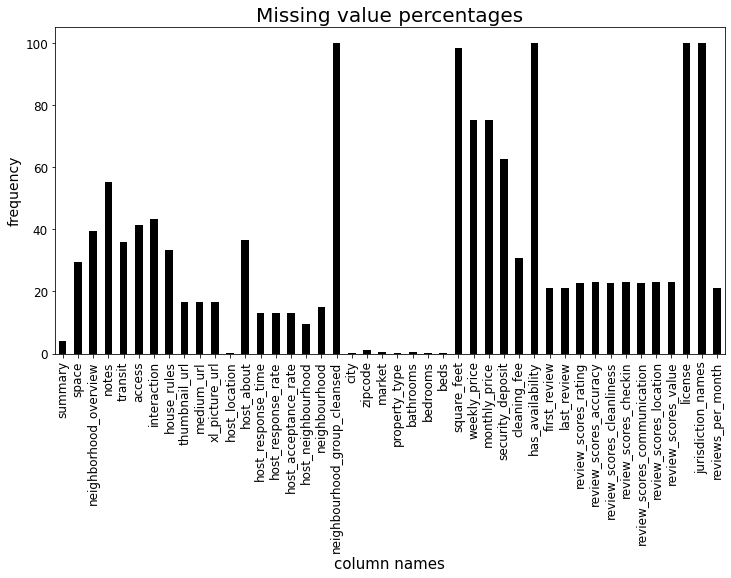

In [21]:
###### plot nullvalue distribution

num_nulls = listings_df.isnull().mean()*100
plt.figure(figsize=(12, 6))
plt.ylabel('frequency', fontsize = 14)
plt.xlabel('column names', fontsize = 15)
plt.title('Missing value percentages', fontsize = 20)
num_nulls[(num_nulls > 0)].plot(kind = 'bar', color = 'black', fontsize = 12)
plt.show()

In [22]:
## show non-numerical-columns
non_num_cols = listings_df.select_dtypes(include=['object']).columns
listings_df[non_num_cols]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
2,https://www.airbnb.com/rooms/6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
3,https://www.airbnb.com/rooms/1436513,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
4,https://www.airbnb.com/rooms/7651065,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,https://www.airbnb.com/rooms/8373729,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,NaN,NaN,...,$24.00,5 days ago,2016-09-06,2015-09-18,2016-08-27,f,t,strict,f,f
3581,https://www.airbnb.com/rooms/14844274,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,NaN,"There is green line, BU shuttle in front of th...",...,$0.00,never,2016-09-06,NaN,NaN,f,f,strict,f,f
3582,https://www.airbnb.com/rooms/14585486,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...","Public transport is 5 minuts away, but walking...",...,$0.00,3 weeks ago,2016-09-06,NaN,NaN,f,f,flexible,f,f
3583,https://www.airbnb.com/rooms/14603878,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,NaN,NaN,...,$30.00,today,2016-09-06,2016-08-27,2016-09-04,f,f,strict,f,f


## drop irrelevan columns

In [23]:
### select drop columns which are irrelavant to analysis 
drop_cols = ['listing_url', 'thumbnail_url', 'medium_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'picture_url', 'xl_picture_url', 'host_url',
       'host_name', 'host_location', 'host_about', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'license', 'jurisdiction_names',
       'reviews_per_month','neighbourhood_group_cleansed','host_id','host_response_time',
       'latitude', 'longitude','access','interaction','host_since','house_rules','host_verifications']

In [24]:
## drop irrelavant columns
listings_df = listings_df.drop(columns = drop_cols)

In [25]:
## convert 't' to True, 'f' to False in binary columns
listings_df[['host_is_superhost', 'host_has_profile_pic', 
             'host_identity_verified','instant_bookable', 
             'require_guest_profile_picture', 
             'require_guest_phone_verification']] = listings_df[['host_is_superhost', 'host_has_profile_pic', 
             'host_identity_verified','instant_bookable', 
             'require_guest_profile_picture', 
             'require_guest_phone_verification',]].replace({"t": True, "f": False})

### review_columns

In [26]:
listings_df.rename(columns = {'id': 'listing_id'}, inplace = True)

<AxesSubplot:>

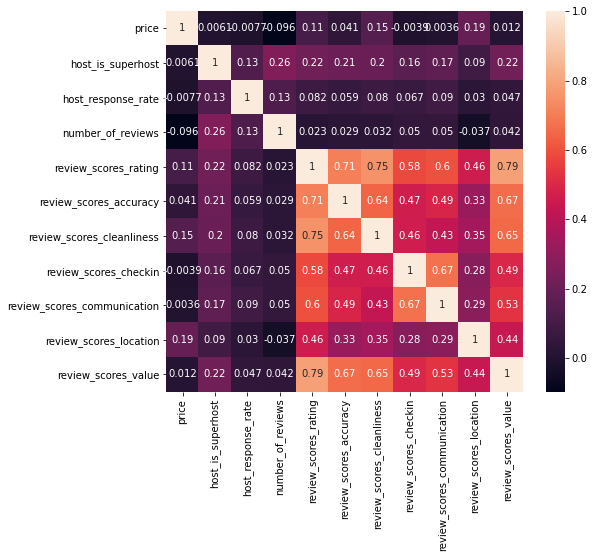

In [27]:
#display heatmap to how much review scores are related each other, price and superhost

plt.figure(figsize = (8, 7))
display(sns.heatmap(listings_df[['price','host_is_superhost','host_response_rate', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']].corr(), annot=True))

* strong correlations are following

* review_scores_rating and review_scores_value are correlated (0.79)
* review_scores_rating and review_scores_cleanliness are also correlated (0.75)
* review_scores_cleanliness and review_scores_value (0.65)
* review_scores_checkin and review_scores_communication (0.67)

surprisingly, price and reviews dont't have strong correlations.

In [28]:
# in order to multi-hot-encode amenity column, preprocess the data
counter = Counter()
for i in range(len(listings_df['amenities'])):
    counter.update(listings_df['amenities'][i].replace("{", "").replace("}", "").split(','))

In [29]:
### multi-hot-encode 
amenities = pd.DataFrame(listings_df['listing_id'])
for el in list(counter.keys()):
    amenities[el] = listings_df['amenities'].apply(lambda e: 1 if el in e else 0)
listings_df.drop('amenities', axis = 1, inplace = True)

As we can see amenities have bias. The largest frequency is 'wireless internet', which might be related with review scores and price.

In [30]:
# room types
# show correlation values between price and other columns.
# show correlation values between review and columns
for room_type in listings_df['room_type'].unique():
    print(room_type)
    for col in ['price', 'review_scores_value']:
        print(col)
        print(listings_df[listings_df['room_type'] == room_type].drop(['listing_id'], axis = 1).corr()[col].sort_values(ascending = False))
        print('\n')

Entire home/apt
price
price                               1.000000
bathrooms                           0.364400
bedrooms                            0.333688
accommodates                        0.296840
beds                                0.281357
guests_included                     0.121607
require_guest_phone_verification    0.121137
review_scores_rating                0.097478
review_scores_cleanliness           0.085709
host_listings_count                 0.069439
review_scores_location              0.058539
calculated_host_listings_count      0.057653
minimum_nights                      0.056029
host_is_superhost                   0.053481
review_scores_accuracy              0.032515
host_response_rate                  0.027823
host_has_profile_pic                0.025647
review_scores_communication         0.018117
review_scores_checkin               0.011663
review_scores_value                 0.004824
host_identity_verified             -0.006660
require_guest_profile_picture    

In [31]:
def display_column_corr(col, room_type):
    """
    This function is to visualize correlation 
    Inputs: col: column such as 'price'
            room_type: string 
    Return: None
    """
    plt.figure(figsize = (14, 6))
    plt.title(f"{room_type}: correlation between columns and {col}", fontsize = 16)
    listings_df[listings_df['room_type'] == room_type].drop(['listing_id'], axis = 1).corr()[col].sort_values(ascending = False).plot(kind = 'bar', color = 'black', fontsize = 10)
    plt.ylabel('correlation value', fontsize = 12)
    plt.show()

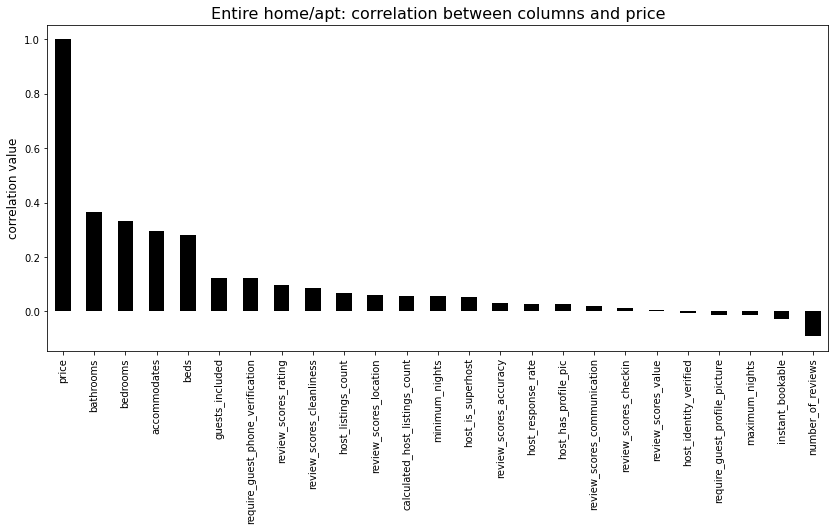

In [32]:
display_column_corr('price', 'Entire home/apt')

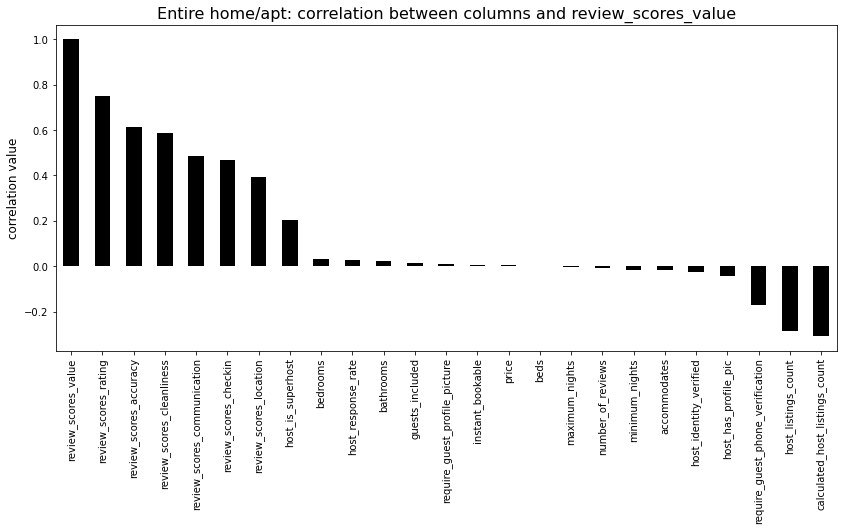

In [33]:
display_column_corr('review_scores_value', 'Entire home/apt')

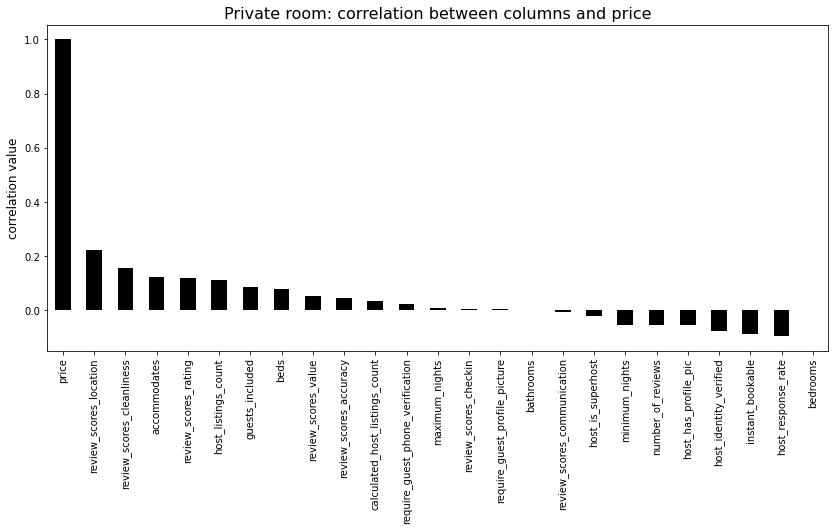

In [34]:
display_column_corr('price', 'Private room')

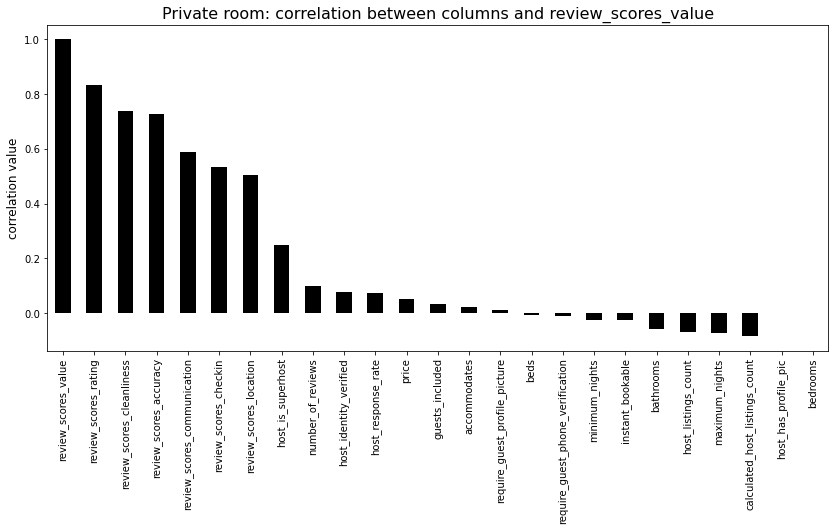

In [35]:
display_column_corr('review_scores_value', 'Private room')

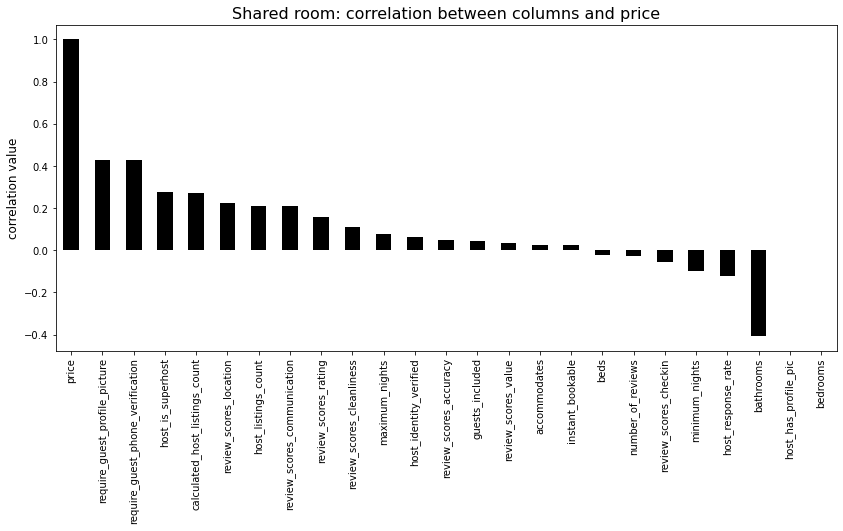

In [36]:
display_column_corr('price', 'Shared room')

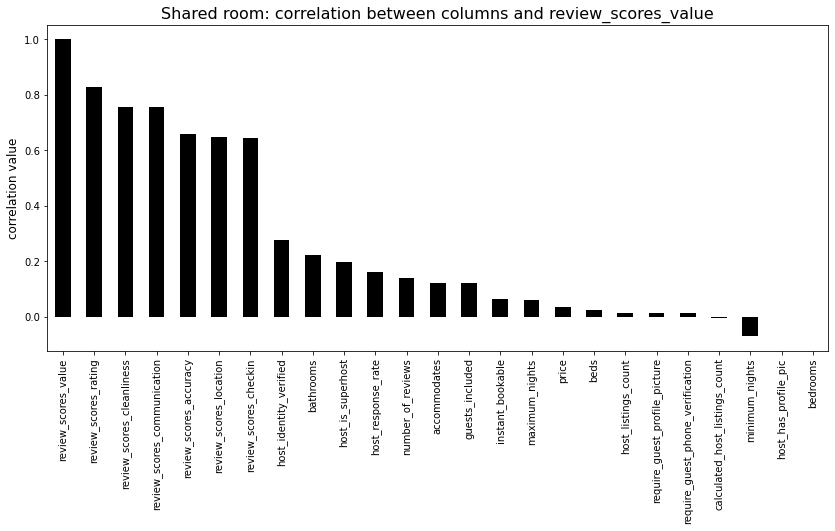

In [37]:
display_column_corr('review_scores_value', 'Shared room')

In [38]:
for room_type in listings_df['room_type'].unique():
    print(room_type)
    for col in ['price', 'review_scores_value']:
        print(col)
        print(pd.merge(listings_df[listings_df['room_type'] == room_type][['listing_id', 'price','review_scores_value']], amenities, on = 'listing_id', how = 'inner').drop(['listing_id'], axis = 1).corr()[col].sort_values(ascending=False))
        print('\n')
        

Entire home/apt
price
price                                           1.000000
Washer                                          0.153172
TV                                              0.140729
"Family/Kid Friendly"                           0.136554
"Air Conditioning"                              0.127539
"Elevator in Building"                          0.117907
Doorman                                         0.116512
"Indoor Fireplace"                              0.116194
"Cable TV"                                      0.110252
Gym                                             0.099766
Dryer                                           0.097015
Dog(s)                                          0.080901
"Suitable for Events"                           0.080613
"Pets live on this property"                    0.066707
Cat(s)                                          0.060172
"First Aid Kit"                                 0.046409
Internet                                        0.045644
Kitchen  

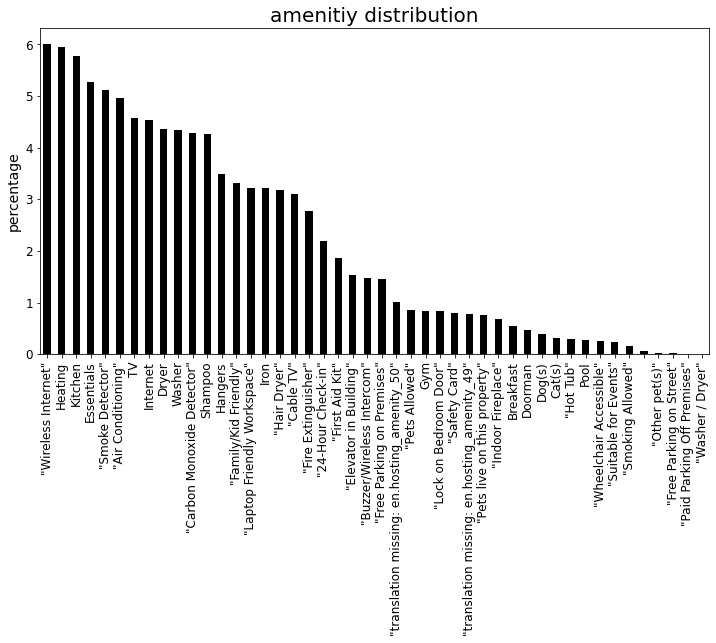

In [39]:
### common amenities. 
amenities_ = (pd.Series(counter) / pd.Series(counter).sum() * 100).sort_values(ascending = False)
plt.figure(figsize=(12, 6))
plt.ylabel('percentage', fontsize = 14)
plt.title('amenitiy distribution', fontsize = 20)
amenities_.plot(kind = 'bar', color = 'black', fontsize = 12)
plt.show()

In [40]:
def display_amenity_corr(col, room_type):
    """
    This function is to visualize correlation with amenities
    Inputs: col: column such as 'price'
            room_type: string 
    Return: None
    """
    plt.figure(figsize = (12, 6))
    plt.title(f"{room_type}: correlation between amenity and {col}", fontsize = 16)
    pd.merge(listings_df[listings_df['room_type'] == room_type][['listing_id','price','review_scores_value']], amenities, on = 'listing_id', how = 'inner').drop(['listing_id'], axis = 1).corr()[col].sort_values(ascending=False).plot(kind = 'bar', color = 'black', fontsize = 12)
    plt.ylabel('correlation value', fontsize = 12)
    plt.show()

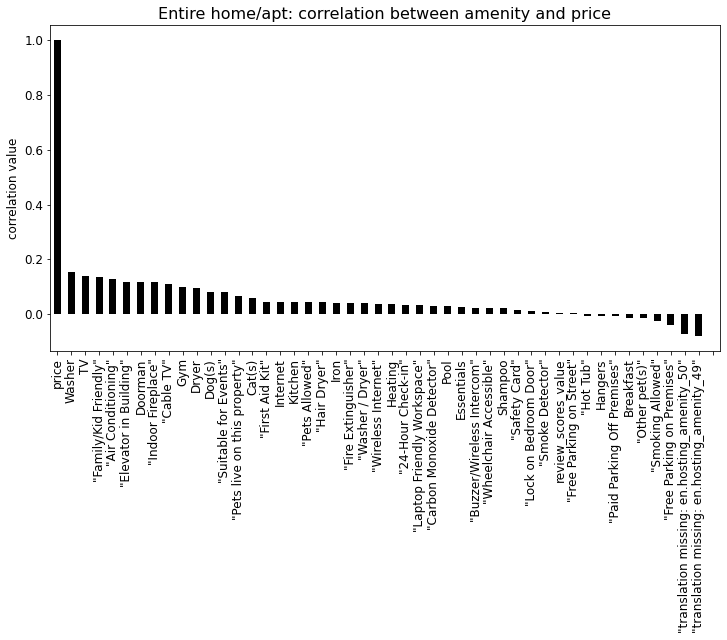

In [41]:
display_amenity_corr('price', 'Entire home/apt')

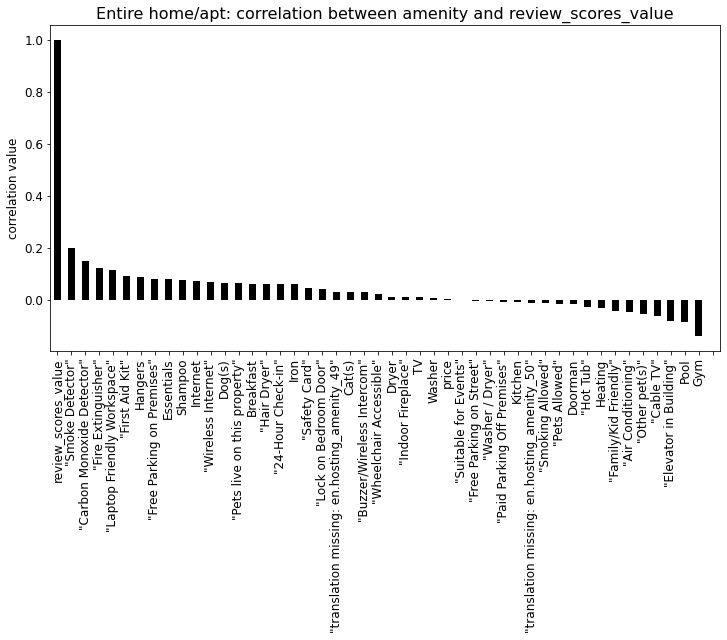

In [42]:
display_amenity_corr('review_scores_value', 'Entire home/apt')

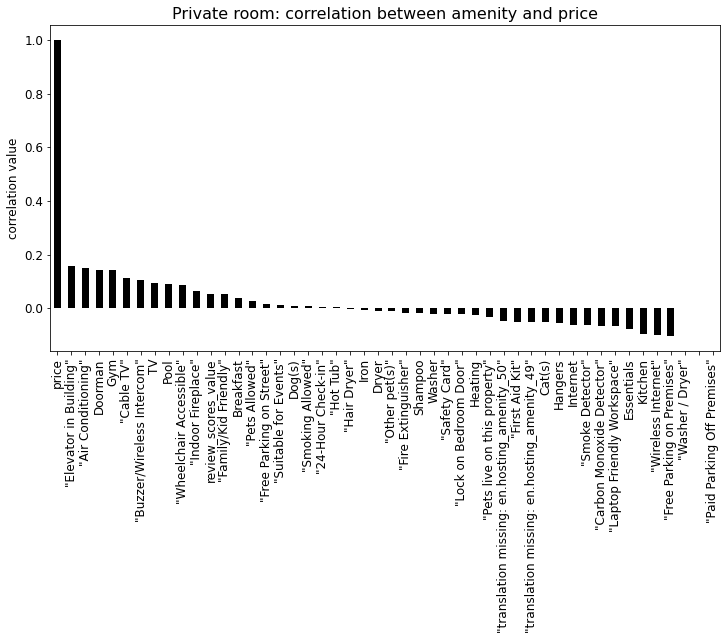

In [43]:
display_amenity_corr('price', 'Private room')

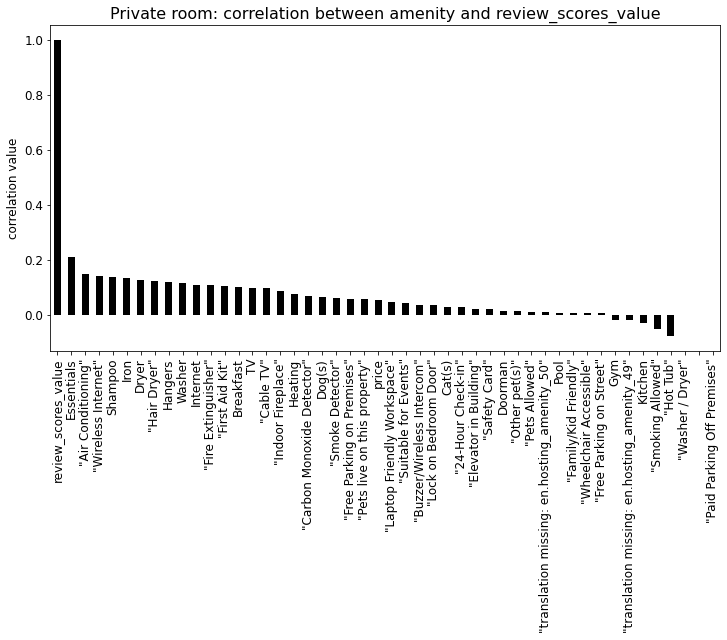

In [44]:
display_amenity_corr('review_scores_value', 'Private room')

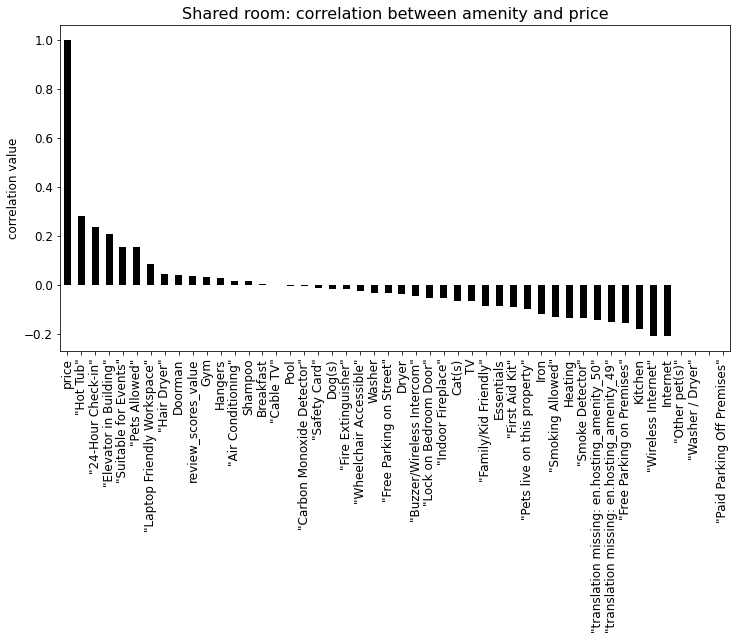

In [45]:
display_amenity_corr('price', 'Shared room')

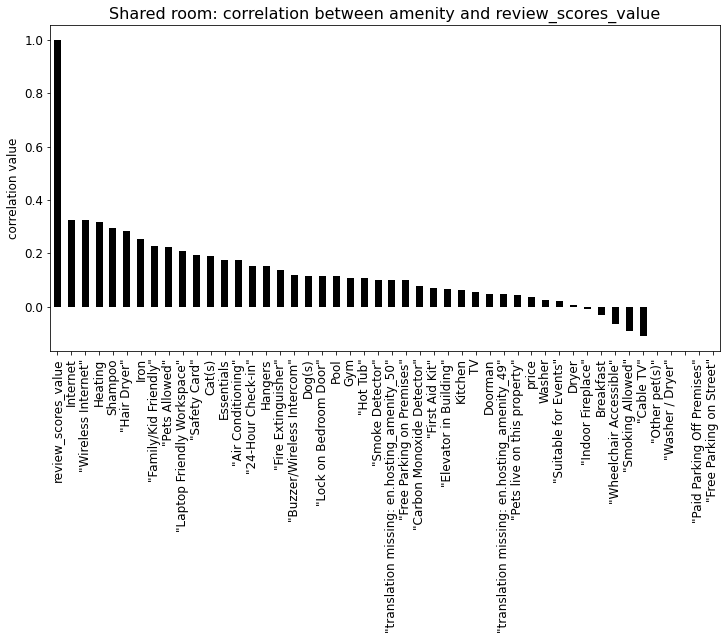

In [46]:
display_amenity_corr('review_scores_value', 'Shared room')

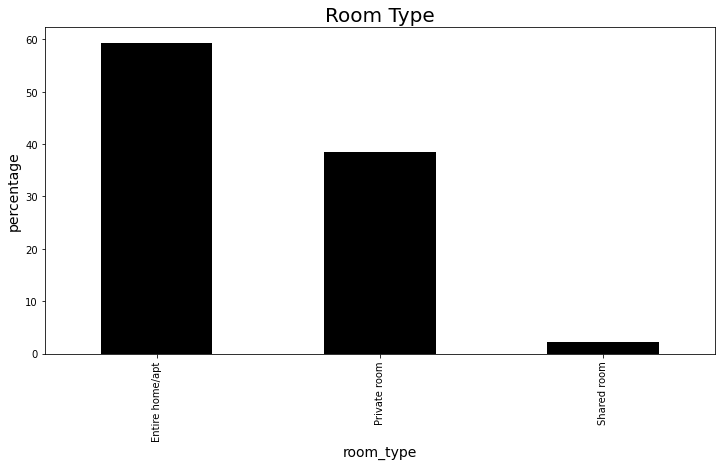

In [47]:
### The number of roomtypes
plt.figure(figsize=(12, 6))
plt.ylabel('percentage', fontsize = 14)
plt.xlabel('room type', fontsize = 14)
plt.title('Room Type', fontsize = 20)
(listings_df.groupby(['room_type'])['listing_id'].count() / listings_df.groupby(['room_type'])['listing_id'].count().sum() * 100).plot(kind = 'bar', color = 'black')
plt.show()

In [48]:
# The entire price description without separating room types 
listings_df['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

### room type separated_data

In [49]:
### display price description by room type
for el in listings_df['room_type'].unique():
    print(el)
    display(listings_df[listings_df.room_type == el]['price'].describe())

Entire home/apt


count    2127.000000
mean      227.436765
std       157.852765
min        11.000000
25%       150.000000
50%       199.000000
75%       269.000000
max      4000.000000
Name: price, dtype: float64

Private room


count    1378.000000
mean       96.041364
std        85.093706
min        10.000000
25%        62.000000
50%        80.000000
75%       100.000000
max      1400.000000
Name: price, dtype: float64

Shared room


count     80.000000
mean      92.762500
std      108.733822
min       20.000000
25%       45.000000
50%       60.000000
75%       99.000000
max      750.000000
Name: price, dtype: float64

In [50]:
def remove_price_outliers(room_type_):
    """
    remove outliers of price from dataframes 
    Inputs: room_type :string 
    Return: dataframe 
    """
    room_type = listings_df.query(f"room_type == '{room_type_}'")
    q1 = room_type['price'].quantile(0.25)
    q3 = room_type['price'].quantile(0.75)
    IQR =  q3 - q1
    IQR
    right_outliers = room_type[room_type['price'] > q3 +  IQR * 1.5]['price']
    lert_outliers = room_type[room_type['price'] <  q1 - IQR * 1.5]['price']
    left_outliers_percent = lert_outliers.shape[0] / room_type.shape[0] * 100
    right_outliers_percent = right_outliers.shape[0] / room_type.shape[0] * 100
    removed_outliers = room_type[(room_type['price'] < q3 +  IQR * 1.5) & (room_type['price'] > q1 -  IQR * 1.5)]
    print(room_type_)
    print(f'left_outliers {round(left_outliers_percent, 2)}%, right_outliers {round(right_outliers_percent, 2)}%')
    
    return removed_outliers

In [51]:
### show the percentage of outliers in each room_type by price
Entire_home_apt = remove_price_outliers('Entire home/apt')
private_room = remove_price_outliers('Private room')
shared_room = remove_price_outliers('Shared room')

Entire home/apt
left_outliers 0.0%, right_outliers 4.84%
Private room
left_outliers 0.0%, right_outliers 8.27%
Shared room
left_outliers 0.0%, right_outliers 7.5%


In [52]:
# separately show the room type price description statistics
removed_outlier_lists = {"Entire_home_apt": Entire_home_apt, 
                         "private_room": private_room,
                         "shared_room": shared_room}
for key, el in removed_outlier_lists.items():
    print(key)
    display(el['price'].describe())

Entire_home_apt


count    2024.000000
mean      205.491601
std        77.395364
min        11.000000
25%       150.000000
50%       199.000000
75%       250.000000
max       429.000000
Name: price, dtype: float64

private_room


count    1263.000000
mean       80.236738
std        27.847050
min        10.000000
25%        60.000000
50%        75.000000
75%        99.000000
max       155.000000
Name: price, dtype: float64

shared_room


count     74.000000
mean      68.202703
std       34.216466
min       20.000000
25%       44.250000
50%       60.000000
75%       84.750000
max      179.000000
Name: price, dtype: float64

Entire house/apt has large std, which indicates the variance is also large. Private and shared room have relativaly small std.

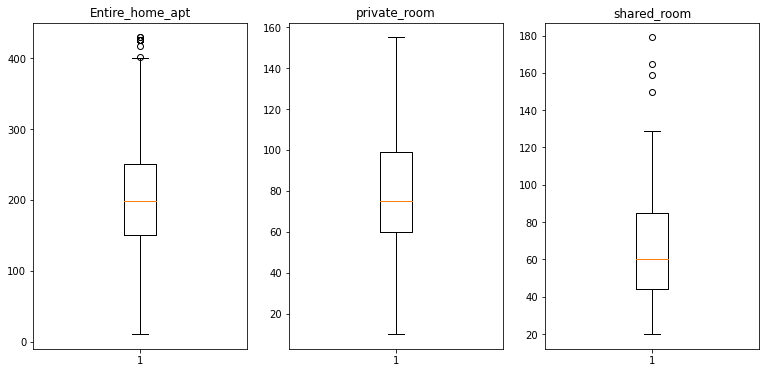

In [53]:
### visualize the price of room type separately 
f, ax = plt.subplots(1,3, figsize = (13, 6))
ax[0].boxplot(Entire_home_apt.price)
ax[0].set_title('Entire_home_apt')
ax[1].boxplot(private_room.price)
ax[1].set_title('private_room')
ax[2].boxplot(shared_room.price)
ax[2].set_title('shared_room')
plt.show()

after removing outliers, Entire_home_apt rents are higher than Private room, and shared_room. Private_room and shared_room don't seem have large difference. 

### superhost
* reference: https://www.airdna.co/blog/airbnb_superhost_status .
How to Qualify for Airbnb Superhost Status
________________________________________________________________________
* Host a minimum of 10 stays in a year
* Respond to guests quickly and maintain a 90% response rate or higher
* Have at least 80% 5-star reviews
* Honor confirmed reservations (meaning hosts should rarely cancel)

In [54]:
# the mean value of review scores based on superhost or nonsuperhost 
listings_df.groupby('host_is_superhost')['review_scores_value'].mean()

host_is_superhost
False    9.076371
True     9.720812
Name: review_scores_value, dtype: float64

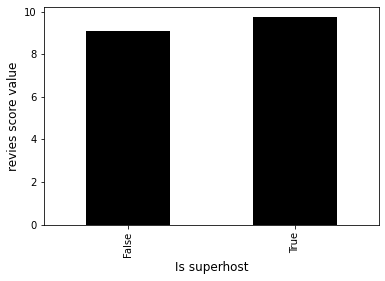

In [55]:
## visualize the mean values of review scores  

listings_df.groupby('host_is_superhost')['review_scores_value'].mean().plot(kind = 'bar', color = 'black')
plt.xlabel('Is superhost', fontsize = 12)
plt.ylabel('revies score value', fontsize = 12)
plt.show()

In [56]:
## convert object to float
listings_df[listings_df['cleaning_fee'].notna()] = to_numerate(listings_df[listings_df['cleaning_fee'].notna()], 'cleaning_fee')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype('float')
listings_df[listings_df['extra_people'].notna()] = to_numerate(listings_df[listings_df['extra_people'].notna()], 'extra_people')
listings_df['extra_people'] = listings_df['extra_people'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [57]:
# get dummy valiables of listings_df
dummied_listings_df = pd.get_dummies(listings_df)

In [58]:
# show the proportion of missing values in dummied_listings_df
missing_df = dummied_listings_df.isna().mean() 
display(missing_df[missing_df > 0])
dummied_listings_df[missing_df[missing_df > 0].index].info()

host_response_rate             0.131381
bathrooms                      0.003905
bedrooms                       0.002789
beds                           0.002510
cleaning_fee                   0.308787
review_scores_rating           0.226778
review_scores_accuracy         0.229568
review_scores_cleanliness      0.228173
review_scores_checkin          0.228731
review_scores_communication    0.228173
review_scores_location         0.229289
review_scores_value            0.229010
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           3114 non-null   float64
 1   bathrooms                    3571 non-null   float64
 2   bedrooms                     3575 non-null   float64
 3   beds                         3576 non-null   float64
 4   cleaning_fee                 2478 non-null   float64
 5   review_scores_rating         2772 non-null   float64
 6   review_scores_accuracy       2762 non-null   float64
 7   review_scores_cleanliness    2767 non-null   float64
 8   review_scores_checkin        2765 non-null   float64
 9   review_scores_communication  2767 non-null   float64
 10  review_scores_location       2763 non-null   float64
 11  review_scores_value          2764 non-null   float64
dtypes: float64(12)
memory usage: 336.2 KB


In [59]:
# show how changed dataframes after encoding 
dummied_listings_df

,listing_id,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,12147973,NaN,False,1,True,False,4,1.5,2.0,3.0,...,0,0,0,0,0,1,0,1,0,0
1,3075044,100.0,False,1,True,True,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
2,6976,100.0,True,1,True,True,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
3,1436513,100.0,False,1,True,False,4,1.0,1.0,2.0,...,0,0,0,0,0,1,0,1,0,0
4,7651065,100.0,True,1,True,True,2,1.5,1.0,2.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,96.0,False,28,True,True,3,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3581,14844274,10.0,False,2,True,True,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3582,14585486,78.0,False,1,True,False,4,1.0,1.0,1.0,...,0,0,0,0,0,1,1,0,0,0
3583,14603878,100.0,False,4,True,True,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [60]:
### fill nullvalues with mean values 

for el in missing_df[missing_df > 0].index:
    if el != 'price':
        dummied_listings_df[el].fillna(dummied_listings_df[el].mean(), inplace = True)

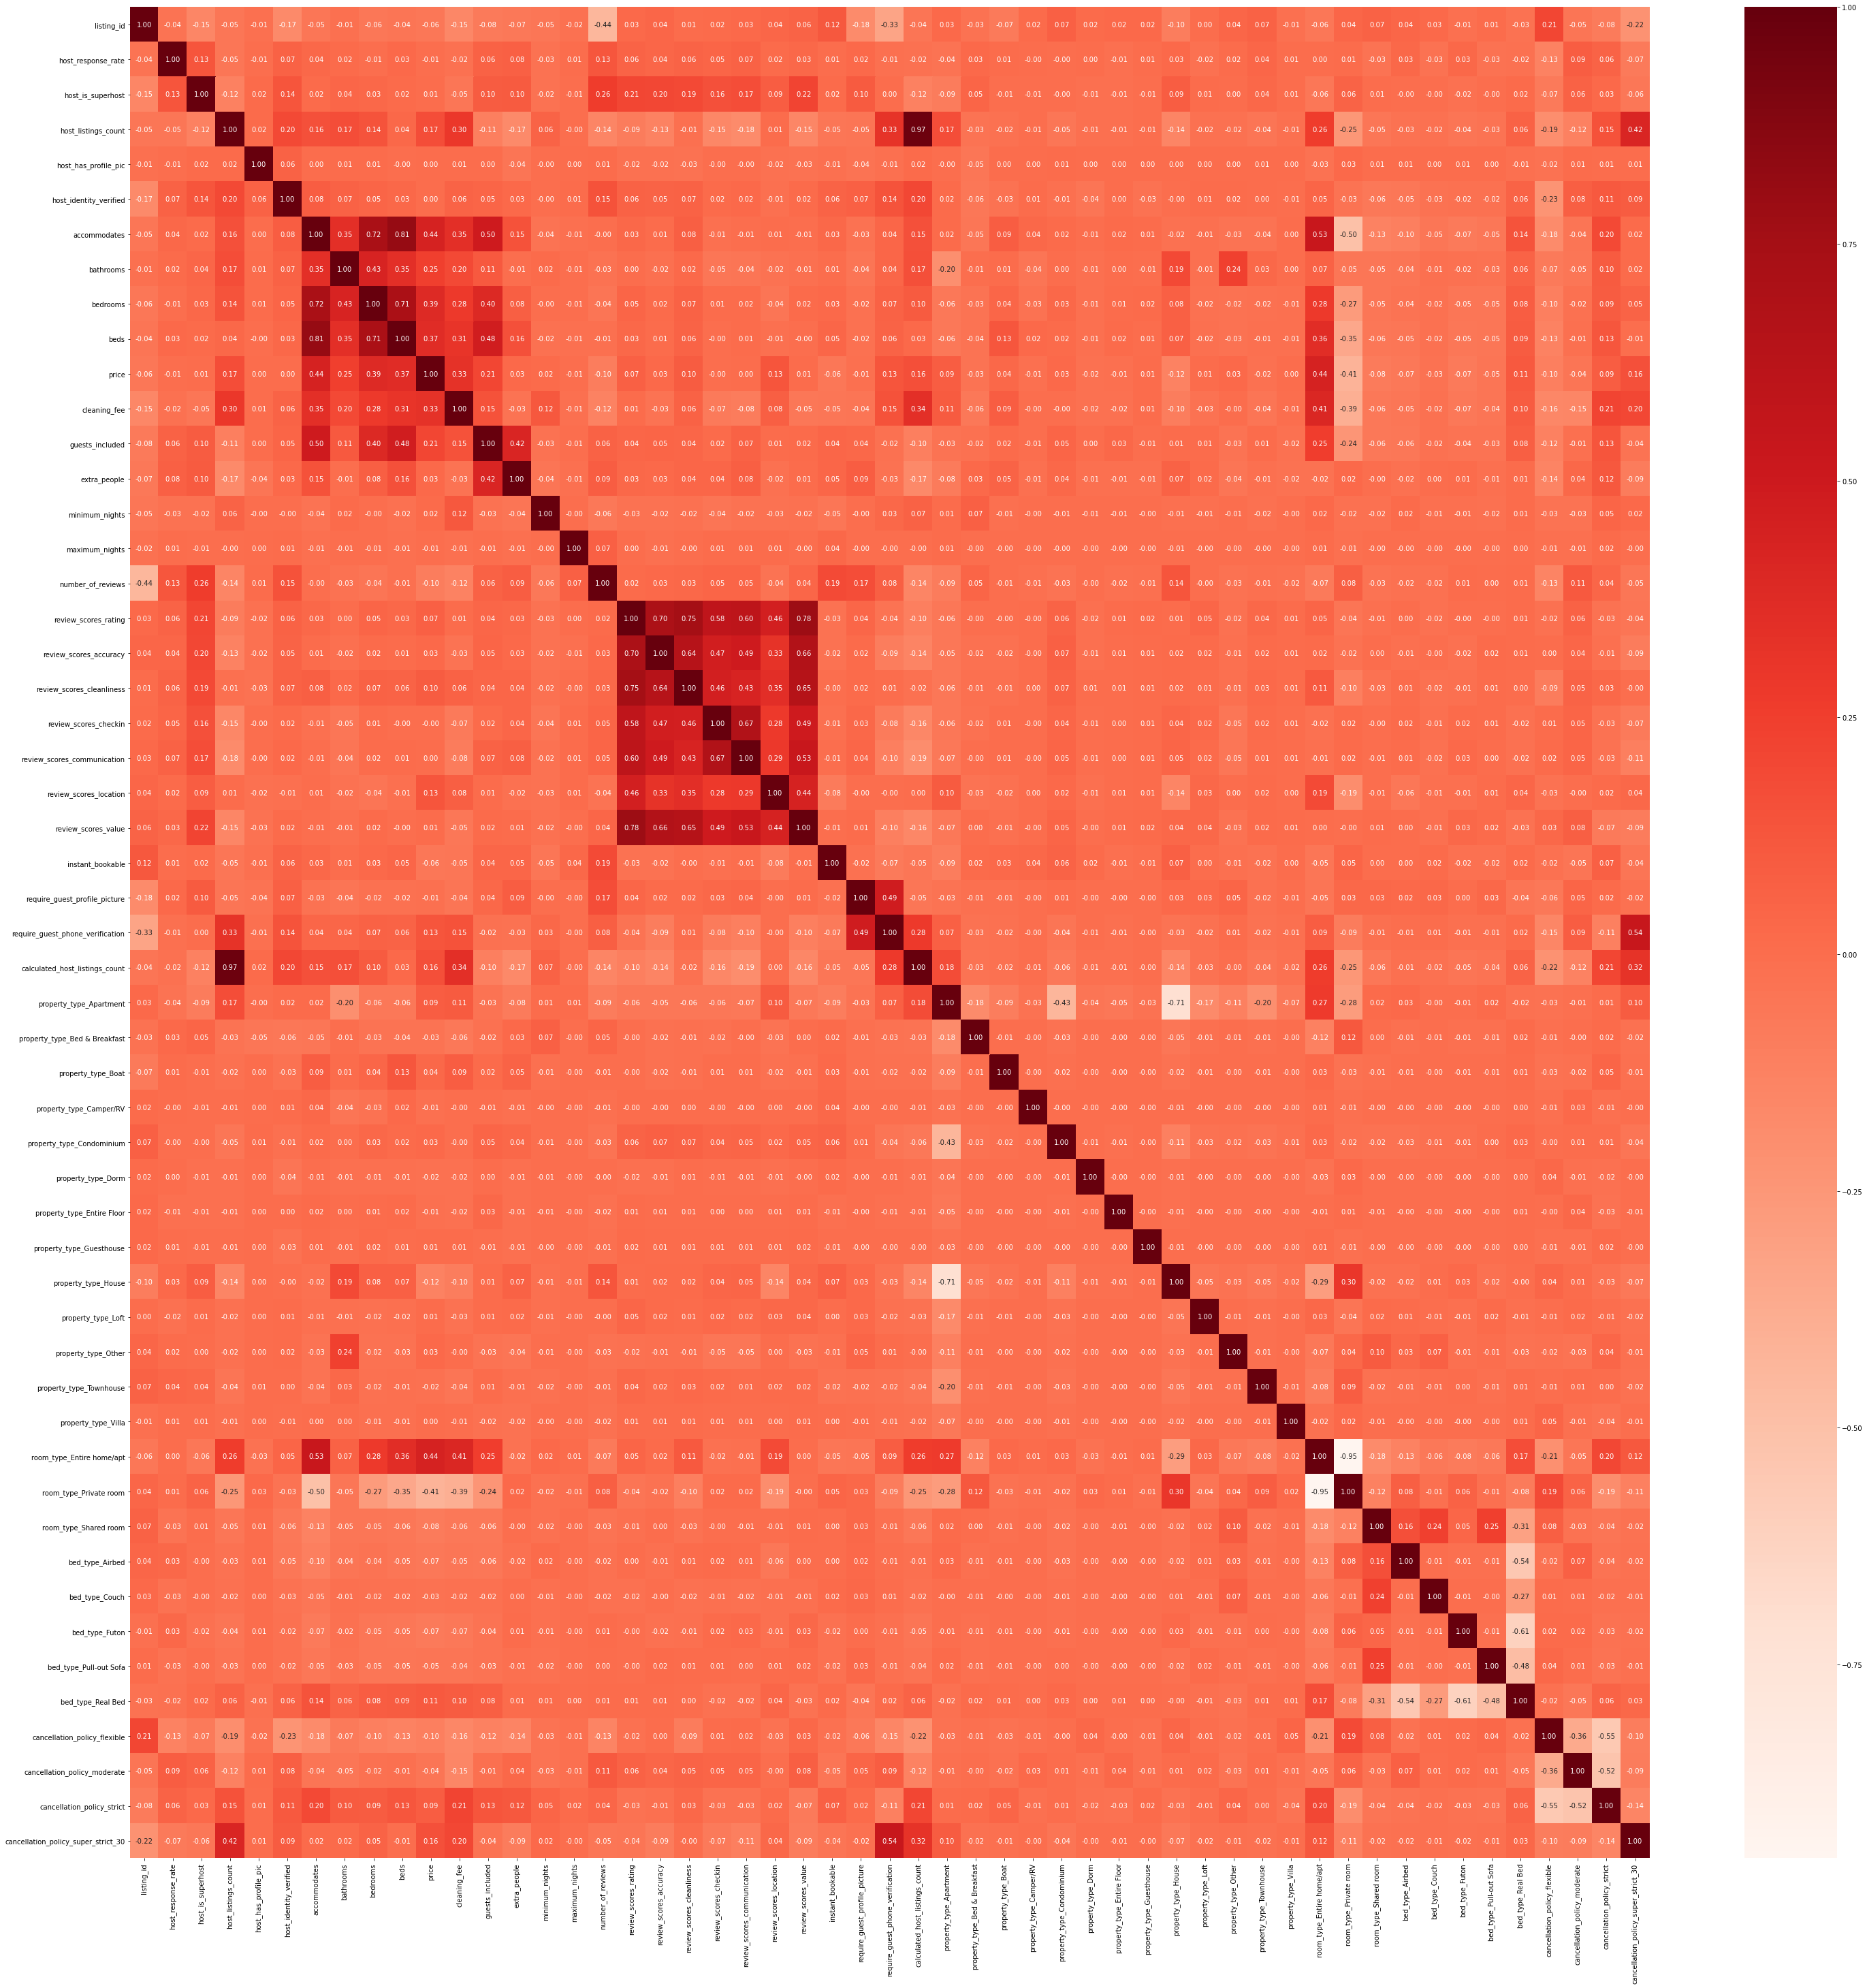

In [61]:
# show correlation in dataframe
plt.figure(figsize=(50,50))
cor = dummied_listings_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.show()

In [62]:
for room_type in ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']:
    print(room_type)
    for col in ['price', 'review_scores_value']:
        print(col)
        print(dummied_listings_df[dummied_listings_df[room_type] == 1].drop(['listing_id'], axis = 1).corr()[col].sort_values(ascending = False))
        print('\n')

room_type_Entire home/apt
price


KeyError: "['host_id'] not found in axis"

## calender_df

In [ ]:
# convert 'f' to False and 't' to True in binary columns (available)
# convert date columns to datetime values 
# building date_month, date_year columns by using date columns 

calender_df['available'].replace({'f': False, 't':True}, inplace = True)
calender_df['date'] = pd.to_datetime(calender_df['date'])
calender_df['date_month'] = calender_df['date'].dt.month
calender_df['date_year_month'] = calender_df['date'].dt.strftime('%Y-%m')
calender_df['date_year'] = calender_df['date'].dt.year


In [ ]:
# convert non numerical columns to numerical values 
calender_df[calender_df.price.notna()] = to_numerate(calender_df[calender_df.price.notna()], 'price')
calender_df.price = calender_df.price.astype('float')

In [ ]:
## show availability by time in month
availability = calender_df.groupby(['date_month'])['available'].value_counts() / (calender_df.groupby('date_month')['available'].value_counts().groupby('date_month').sum()) * 100
availability

In [ ]:
### the number of unique listing_id 
### check if all unique listing_ids exist in calender_if
print("The number of unique listing_id in listings_df: ", listings_df.listing_id.nunique())
print("The number of unique listing_id in calender_df: ", calender_df.listing_id.nunique())

In [ ]:
### The average number of null values
calender_df.isnull().mean()

## concatenation: (listings_df, calender_df)

In [ ]:
df = listings_df.drop('price', axis =1).merge(calender_df, on='listing_id', how = 'inner')

In [ ]:
# remove % and convert the values to numerical
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
df['host_response_rate'] = df['host_response_rate'].astype(float)

## visualize how price changes by season

In [ ]:
for room_type in df.room_type.unique():
    plt.figure(figsize = (7, 5))
    plt.title(room_type, fontsize = 16)
    plt.ylabel('price', fontsize = 14)
    plt.xlabel('Month', fontsize = 14)
    df[df['room_type'] == room_type].groupby('date_month').price.mean().plot(color = 'black')
    plt.show()

## show availability 

In [ ]:
for room_type in df.room_type.unique():
    plt.figure(figsize = (7, 5))
    plt.title(room_type, fontsize = 16)
    plt.ylabel('Availability counts', fontsize = 14)
    plt.xlabel('Month', fontsize = 14)
    df[df['room_type'] == room_type].groupby(['available'])['date_month'].get_group(True).value_counts().plot(kind='bar', color='black')
    plt.show()

## summary 

Q
* What attributes higher price? 
-- cleaning_fee, strict cancellation policy, accommodates  
* What attributes higher review values?  
-- cleanliness, locations, flexible-moderate cancellatioon policy
* Which season is better to join airbnb? 
-- between August to November 

According to the above correlations, the strategies different room type hosts should take in order to maximize profits. However, there are a few similarities to increase review rates. First, the hosts need to pay more attention to factors that lead to higher rates.
* Hosts are super hosts
* Cancellation polity flexible or moderate
* Keeping rooms cleaned
* higher communication skill
* select better locations
* Install wireless internet, air conditioner, washing machine, and dryer.

#### medium url 
https://medium.com/@kazuma1001/the-difference-between-what-hosts-expect-and-what-residents-expect-4d021e4109b8